Import Libraries

In [56]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle


Load the Data

In [57]:
data=pd.read_csv("survey lung cancer.csv")
data.drop(["AGE","GENDER","PEER_PRESSURE","FATIGUE ","WHEEZING"],axis="columns",inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SMOKING                309 non-null    int64 
 1   YELLOW_FINGERS         309 non-null    int64 
 2   ANXIETY                309 non-null    int64 
 3   CHRONIC DISEASE        309 non-null    int64 
 4   ALLERGY                309 non-null    int64 
 5   ALCOHOL CONSUMING      309 non-null    int64 
 6   COUGHING               309 non-null    int64 
 7   SHORTNESS OF BREATH    309 non-null    int64 
 8   SWALLOWING DIFFICULTY  309 non-null    int64 
 9   CHEST PAIN             309 non-null    int64 
 10  LUNG_CANCER            309 non-null    object
dtypes: int64(10), object(1)
memory usage: 26.7+ KB


In [59]:
data.describe()

,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,ALLERGY,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,1.563107,1.569579,1.498382,1.504854,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,0.496806,0.495938,0.500808,0.500787,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [60]:
data.columns

Index(['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'CHRONIC DISEASE', 'ALLERGY ',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [61]:
data.head()

,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,ALLERGY,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,2,2,1,1,2,2,2,2,2,YES
1,2,1,1,2,2,1,1,2,2,2,YES
2,1,1,1,1,1,1,2,2,1,2,NO
3,2,2,2,1,1,2,1,1,2,2,NO
4,1,2,1,1,1,1,2,2,1,1,NO


Data Cleaning and Feature Engineering

In [62]:
data.isna().any()

SMOKING                  False
YELLOW_FINGERS           False
ANXIETY                  False
CHRONIC DISEASE          False
ALLERGY                  False
ALCOHOL CONSUMING        False
COUGHING                 False
SHORTNESS OF BREATH      False
SWALLOWING DIFFICULTY    False
CHEST PAIN               False
LUNG_CANCER              False
dtype: bool

There are no null values here

In [63]:
feature = data.drop("LUNG_CANCER",axis="columns")
target = data["LUNG_CANCER"]

In [64]:
feature.head()

,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,ALLERGY,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,2,2,1,1,2,2,2,2,2
1,2,1,1,2,2,1,1,2,2,2
2,1,1,1,1,1,1,2,2,1,2
3,2,2,2,1,1,2,1,1,2,2
4,1,2,1,1,1,1,2,2,1,1


In [65]:
target.head()

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object

In [66]:
# common_age = data['AGE'].value_counts()
# common_age.head()

In [67]:
# common_age.plot(kind='bar')
# plt.show()

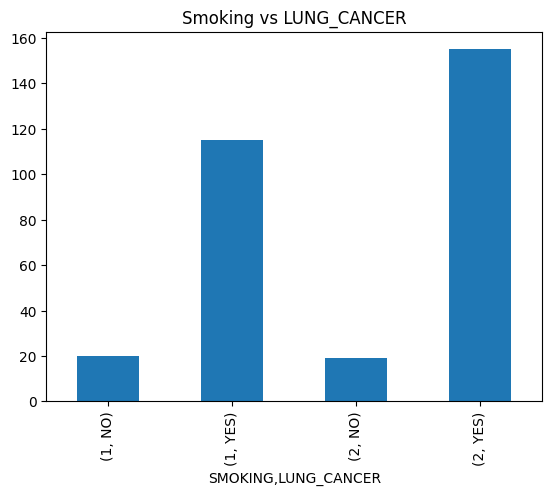

In [68]:
#Relation between smoking and lung cancer
data.groupby(['SMOKING','LUNG_CANCER']).SMOKING.count().plot(kind='bar')
plt.title('Smoking vs LUNG_CANCER')
plt.show()

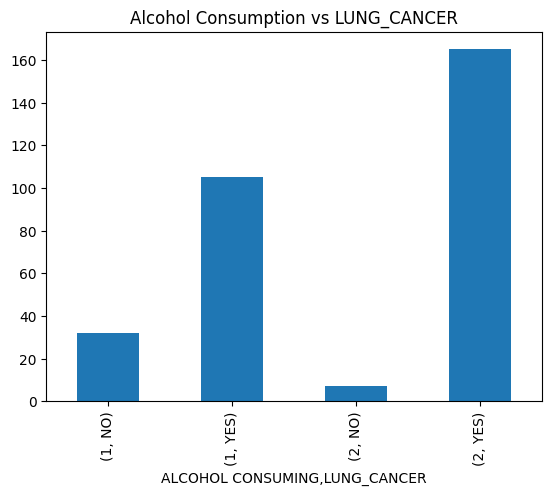

In [69]:
#Relation between alcohol consumption and lung cancer
data.groupby(['ALCOHOL CONSUMING','LUNG_CANCER']).SMOKING.count().plot(kind='bar')
plt.title('Alcohol Consumption vs LUNG_CANCER')
plt.show()

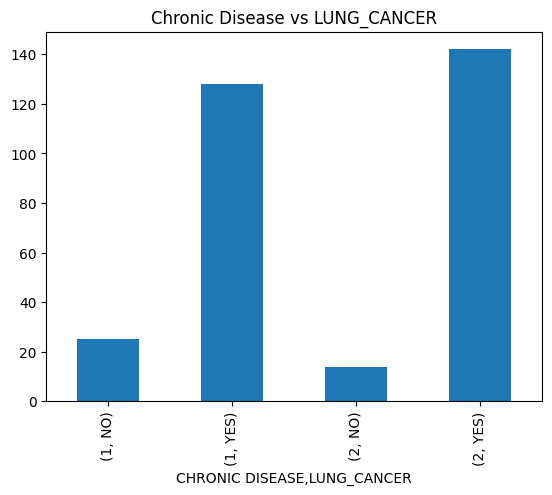

In [70]:
#Relation between Chronic Disease and LUNG_CANCER
data.groupby(['CHRONIC DISEASE','LUNG_CANCER']).SMOKING.count().plot(kind='bar')
plt.title('Chronic Disease vs LUNG_CANCER')
plt.show()

In [71]:
# #Patient having LUNG_CANCER = 2 & Patient not having LUNG_CANCER = 1
# data['LUNG_CANCER'] = data['LUNG_CANCER'].replace('YES','2')
# data['LUNG_CANCER'] = data['LUNG_CANCER'].replace('NO','1')

Train and Test

In [72]:
x_train, x_test, y_train, y_test = train_test_split(feature,target,random_state=130)

Models

In [73]:
model = GaussianNB()
model.fit(feature,target)

GaussianNB()

Classification Report

In [74]:
cr = classification_report(y_test, model.predict(x_test))
cr

'              precision    recall  f1-score   support\n\n          NO       0.80      0.50      0.62         8\n         YES       0.95      0.99      0.97        70\n\n    accuracy                           0.94        78\n   macro avg       0.87      0.74      0.79        78\nweighted avg       0.93      0.94      0.93        78\n'

Predict

In [75]:
data=[[1,2,2,1,1,2,2,2,2,2]]
res = model.predict(data)
print(res)

['YES']


c:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
